In [2]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
Image_Size = 256
Channels = 3
Batch_Size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    "dataset/train",
    target_size=(Image_Size,Image_Size),
    batch_size=32,
    class_mode="sparse"
    #save_to_dir="AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [4]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

validation_generator = validation_datagen.flow_from_directory(
    "dataset/val",
    target_size=(Image_Size,Image_Size),
    batch_size=32,
    class_mode="sparse"
    #save_to_dir="AugmentedImages"
)

Found 215 images belonging to 3 classes.


In [5]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator = test_datagen.flow_from_directory(
    "dataset/test",
    target_size=(Image_Size,Image_Size),
    batch_size=32,
    class_mode="sparse"
    #save_to_dir="AugmentedImages"
)

Found 431 images belonging to 3 classes.


In [30]:
for Image_batch, label_batch in train_generator:
    print(Image_batch[0])
    print(label_batch)
    break

[[[0.6132076  0.5622272  0.58967817]
  [0.6114003  0.5604199  0.5878709 ]
  [0.5996781  0.5486977  0.5761487 ]
  ...
  [0.4013401  0.33467343 0.35820284]
  [0.4053335  0.3386668  0.3621962 ]
  [0.40932685 0.3426602  0.3661896 ]]

 [[0.61287475 0.56189436 0.58934534]
  [0.6123987  0.5614183  0.5888693 ]
  [0.6006765  0.549696   0.577147  ]
  ...
  [0.45193526 0.3852686  0.408798  ]
  [0.46857432 0.40190765 0.42543706]
  [0.48521337 0.4185467  0.44207612]]

 [[0.612542   0.5615616  0.58901256]
  [0.613397   0.5624166  0.5898676 ]
  [0.6016748  0.5506944  0.5781454 ]
  ...
  [0.643721   0.57705426 0.6005837 ]
  [0.64605045 0.5793838  0.6029132 ]
  [0.6483799  0.58171326 0.60524267]]

 ...

 [[0.7506067  0.6957047  0.6957047 ]
  [0.7549328  0.70003086 0.70003086]
  [0.759259   0.70435697 0.70435697]
  ...
  [0.5807778  0.5180327  0.52979743]
  [0.68440515 0.62166005 0.63342476]
  [0.50971794 0.4469729  0.4587376 ]]

 [[0.75602144 0.7011195  0.7011195 ]
  [0.7543575  0.69945556 0.69945556]


In [7]:
#!pip install split-folders

In [8]:
#!split_folders --output dataset --ratio .7 .1 .2 -- PlantVillage

In [35]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\radha\Desktop\AI Projects\POTATO_DISEASES_DETECTION\potato\PlantVillage",
    shuffle=True,
    image_size=(Image_Size,Image_Size),
    batch_size=Batch_Size
)

Found 2152 files belonging to 3 classes.


In [36]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
data_format='channel_first'
input_shape=(Image_Size,Image_Size,Channels)
n_classes=3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),
])

#model.build(input_shape=input_shape)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [11]:
 model.compile(
 optimizer="adam",
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
 metrics=["accuracy"]
 )

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20
)

Epoch 1/20
47/47 [==============================] - 134s 3s/step - loss: 0.9245 - accuracy: 0.4722 - val_loss: 0.9135 - val_accuracy: 0.4740
Epoch 2/20
47/47 [==============================] - 143s 3s/step - loss: 0.8359 - accuracy: 0.5550 - val_loss: 0.7286 - val_accuracy: 0.6667
Epoch 3/20
47/47 [==============================] - 137s 3s/step - loss: 0.5029 - accuracy: 0.7863 - val_loss: 0.4035 - val_accuracy: 0.8438
Epoch 4/20
47/47 [==============================] - 157s 3s/step - loss: 0.3256 - accuracy: 0.8664 - val_loss: 0.3766 - val_accuracy: 0.8438
Epoch 5/20
47/47 [==============================] - 124s 3s/step - loss: 0.2766 - accuracy: 0.8867 - val_loss: 0.2216 - val_accuracy: 0.8958
Epoch 6/20
47/47 [==============================] - 120s 3s/step - loss: 0.2347 - accuracy: 0.9091 - val_loss: 0.3418 - val_accuracy: 0.8906
Epoch 7/20
47/47 [==============================] - 120s 3s/step - loss: 0.1870 - accuracy: 0.9328 - val_loss: 0.2302 - val_accuracy: 0.9062
Epoch 8/20
47

In [14]:
scores=model.evaluate(test_generator)

14/14 [==============================] - 12s 873ms/step - loss: 0.0734 - accuracy: 0.9652


In [15]:
scores

[0.07338578253984451, 0.9651972055435181]

In [16]:
history

In [17]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
acc=history.history["accuracy"]
acc

[0.47218453884124756,
 0.5549525022506714,
 0.7862957715988159,
 0.8663500547409058,
 0.886702835559845,
 0.9090909361839294,
 0.9328358173370361,
 0.9308510422706604,
 0.9416553378105164,
 0.9620081186294556,
 0.9715061187744141,
 0.9531885981559753,
 0.9748982191085815,
 0.975576639175415,
 0.9810040593147278,
 0.987109899520874,
 0.9748982191085815,
 0.9640434384346008,
 0.9626865386962891,
 0.9735413789749146]

In [20]:
val_acc=history.history["val_accuracy"]
val_acc

[0.4739583432674408,
 0.6666666865348816,
 0.84375,
 0.84375,
 0.8958333134651184,
 0.890625,
 0.90625,
 0.9270833134651184,
 0.9583333134651184,
 0.9739583134651184,
 0.9635416865348816,
 0.953125,
 0.9583333134651184,
 0.9791666865348816,
 0.96875,
 0.9791666865348816,
 0.9427083134651184,
 0.984375,
 0.9583333134651184,
 0.9947916865348816]

In [21]:
loss=history.history["loss"]
loss

[0.9245402812957764,
 0.8359118103981018,
 0.5028530359268188,
 0.32560601830482483,
 0.27659979462623596,
 0.23466357588768005,
 0.18700182437896729,
 0.1877347081899643,
 0.15387062728405,
 0.10153408348560333,
 0.07323043793439865,
 0.1362493634223938,
 0.07598938792943954,
 0.057095229625701904,
 0.051516979932785034,
 0.036247618496418,
 0.06339062005281448,
 0.09543056786060333,
 0.10694526880979538,
 0.07694695889949799]

In [22]:
val_loss=history.history["val_loss"]
val_loss

[0.9134633541107178,
 0.7286164164543152,
 0.4035167694091797,
 0.37664568424224854,
 0.22164909541606903,
 0.3417734205722809,
 0.2301674336194992,
 0.16527122259140015,
 0.15492340922355652,
 0.06743809580802917,
 0.07810106873512268,
 0.07783874124288559,
 0.0981263741850853,
 0.053546905517578125,
 0.09702389687299728,
 0.052099037915468216,
 0.1757817268371582,
 0.08554011583328247,
 0.08225217461585999,
 0.041856568306684494]

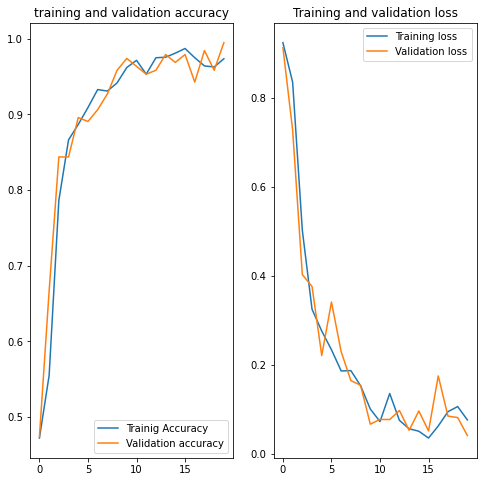

In [23]:
epochs=20
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label="Trainig Accuracy")
plt.plot(range(epochs), val_acc, label="Validation accuracy")
plt.legend(loc="lower right")
plt.title("training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label="Training loss")
plt.plot(range(epochs), val_loss, label="Validation loss")
plt.legend(loc="upper right")
plt.title("Training and validation loss")
plt.show()

first image to predict
actual label:  Potato___Early_blight
predicted label:  Potato___Early_blight


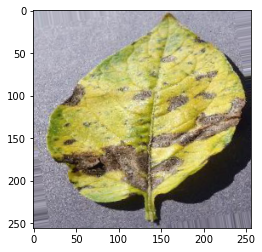

In [38]:
import numpy as np
for images_batch, labels_batch in test_generator:
    first_img= images_batch[0]
    first_label= labels_batch[0]
    print("first image to predict")
    plt.imshow(first_img)
    print("actual label: ", class_names[int(first_label)])
    
    batch_prediction=model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])
    
    break

In [41]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i])
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

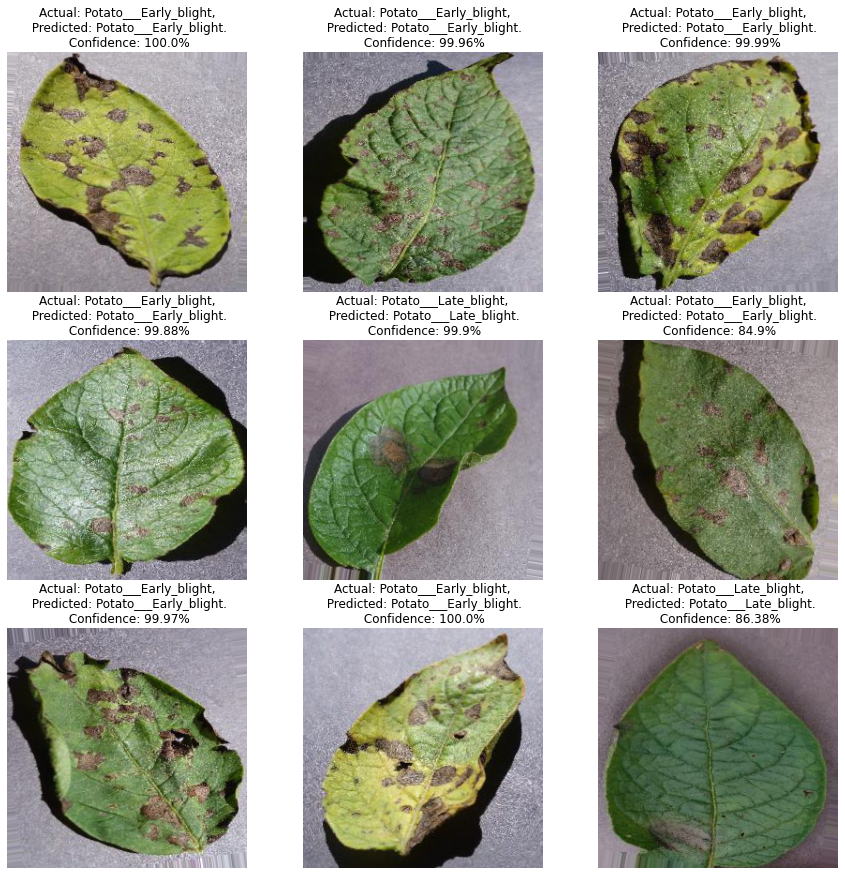

In [42]:
plt.figure(figsize=(15,15))
for images, labels in test_generator:
    for i in range(9):
        ax=plt.subplot(3,3,i+1)   
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model,images[i])
        actual_class=class_names[int(labels[i])]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    break

In [43]:
model.save("../potato_disease_classification.h5")